## Class impalance
- Classification for predicting fraudulent bank transactions
    - 99% of transactions are legitimate; 1% are fraudulent
- Could build a classifier that predicts NONE of the transactions are fraudulent
    - 99% accurate!
    - But terrible at actually predicting fraudulent transactions (fails original purpose)
- Class imbalance: Uneven frequency of classes

Assessing classification performance with a confusion matrix

Precision = True positives/(true positives + false positives)
- High precision = lower positive rate
- High precision = Not many legitimate transactions are predicted to be fraudulent

Recall = True positives/true positives + false negatives
- High recall = lower false negative rate
- High recall: Predicted most fraudulent transactions correctly

F1 Score: 2*(precision*recall/(precision+recall))
-harmonic mean between precision and recall, factors in number of errors and type of errors

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold

churn_df = pd.read_csv('../resources/telecom_churn_clean.csv')

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "/usr/local/bin/python3.9"
  * The NumPy version is: "1.25.2"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so, 0x0002): tried: '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e' or 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so' (no such file), '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e' or 'arm64'))


In [5]:
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1129    9]
 [ 189    7]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1138
           1       0.44      0.04      0.07       196

    accuracy                           0.85      1334
   macro avg       0.65      0.51      0.49      1334
weighted avg       0.80      0.85      0.79      1334



In [25]:
diabetes_df = pd.read_csv('../resources/diabetes_clean.csv')
X = diabetes_df[['bmi', 'age']]
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[117  34]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.60       231
weighted avg       0.64      0.65      0.64       231



## Logistic regression for binary classification
- Logistic regression is used for classification problems
- Logistic regression outputs probability
- If probability, p > 0.5
    - data is labeled 1
- If probability, p < 0.5
    - data is labeled 0

### Probability thresholds
- By default, logistic regression threshold = 0.5
- Not specific to logistic regression
- KNN classifiers also have thresholds
- What happens if we vary the threshold
- **use a ROC curve (from 0 to 1 with 1 being ideal)**

In [30]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_probs = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_probs)

In [35]:
diabetes_df = pd.read_csv('../resources/diabetes_clean.csv')

X = diabetes_df.drop("diabetes", axis=1)
y = diabetes_df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
#Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26653165 0.19014682 0.12360024 0.14565342 0.50456534 0.45328168
 0.01327948 0.59612298 0.56324867 0.79991141]


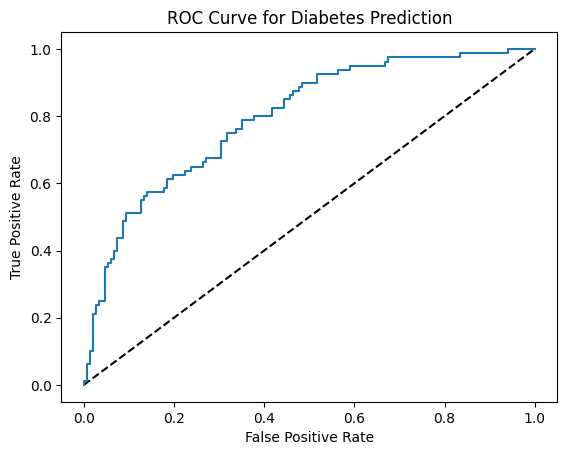

In [42]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

# The model is much better than randomly guessing the class of each observation

In [43]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7966059602649006
[[122  29]
 [ 52  28]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       151
           1       0.49      0.35      0.41        80

    accuracy                           0.65       231
   macro avg       0.60      0.58      0.58       231
weighted avg       0.63      0.65      0.63       231



## Hyperparameter tuning
- Ridge/lasso regression: Choosing alpha
- KNN: Choosing n_neighbors
- Hyperparameters: we specify before fitting the model

### Choosing th correct hyperparameters
1. Try lots of different hyperparameter values
2. Fit all of them separately
3. See how well they perform
4. Choose the best performing values

- Called hyperparameter tuning
- It is essential to use cross-validation to avoid overfitting the test data
- We can still split the data and perform cross-validation on the training set
- We withold the test set for final evaluation

### Grid search cross-validation
- choose a grid of possible hyperparameter values to try
- search across two hyperparameters for a KNN model

### Limitations and an alternative approach
- 3-fold cross validation, 1 hyperparameter, 10 total values = 30 fits
- 10- fold cross-validation, 3 hyperparameters, 30 total values = 900 fits
- does not scale well

### RandomizedSearchCV
- picks random hyperparameter values rather than exhaustively searching through all options

In [47]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [50]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': np.float64(1e-05)}
Tuned lasso score: 0.29604708033272703


In [51]:
#Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

# In Training console: Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set!

Tuned Logistic Regression Parameters: {'tol': np.float64(0.4082224489795918), 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': np.float64(0.5959183673469388)}
Tuned Logistic Regression Best Accuracy Score: 0.6405849775008654


/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlrix/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  Fi